In [1]:
from init import *

import time

# One Laser, resonant to F=2 -> F'=2, D1

- natural decay

## Full Hamiltonian With Off-Resonant Terms

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

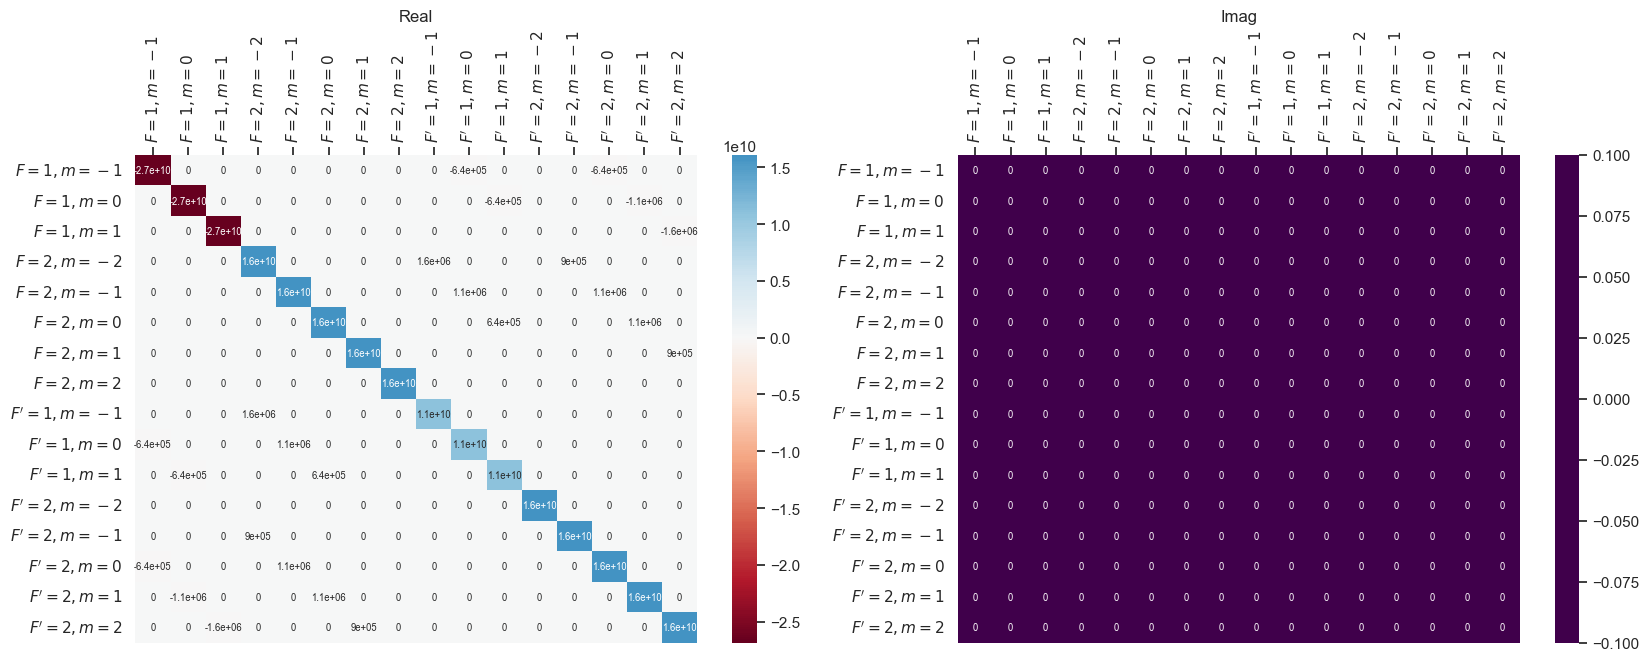

In [2]:
hamil = laser_sigma_plus_F2_FP2_D1(
    OFF_RESONANT_SATURATION_INTENSITY_D1_PI_POL / 100)
maplot(hamil, annot=True)

In [3]:
L = liouvillian(
    hamil,
    c_ops=(
        natural_decay_ops_D1() 
        # + F1_to_F2_ground_state_decay("D1") 
        # + F2_to_F1_ground_state_decay("D1")
        )
    )
rho_ss = steadystate(L)

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

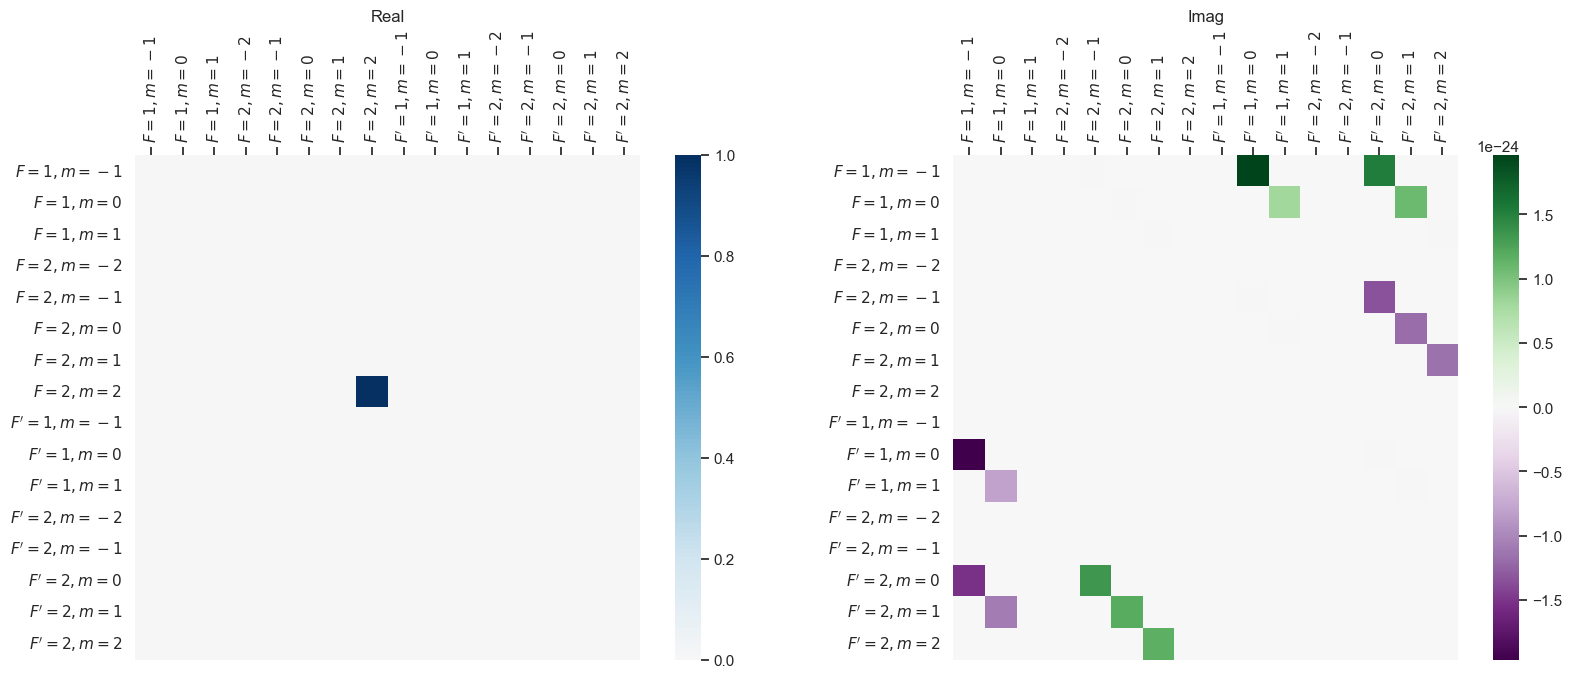

In [4]:
maplot(rho_ss)

In [12]:
start = time.perf_counter()

times = np.linspace(0, 50 / abs(hamil[-4,3]), 2000)
res = mesolve(L,
              tlist=times,
              rho0=get_equally_ground_state_D1(),
              options=Options(nsteps=2**5 * 1000))
stop = time.perf_counter()
print(f"""Time Evo "Exact" took {stop-start:.3f} seconds ------""")

qsave(res, "pumping_sigma_plus_f2_fp2_radecay")

Time Evo "Exact" took 209.939 seconds ------


(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

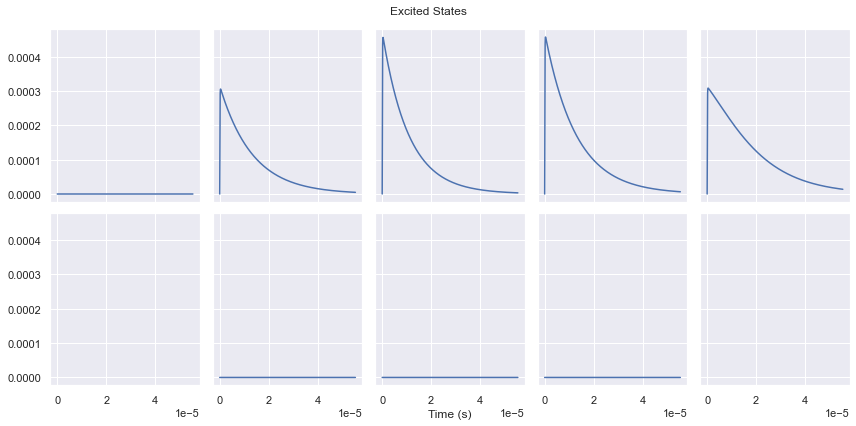

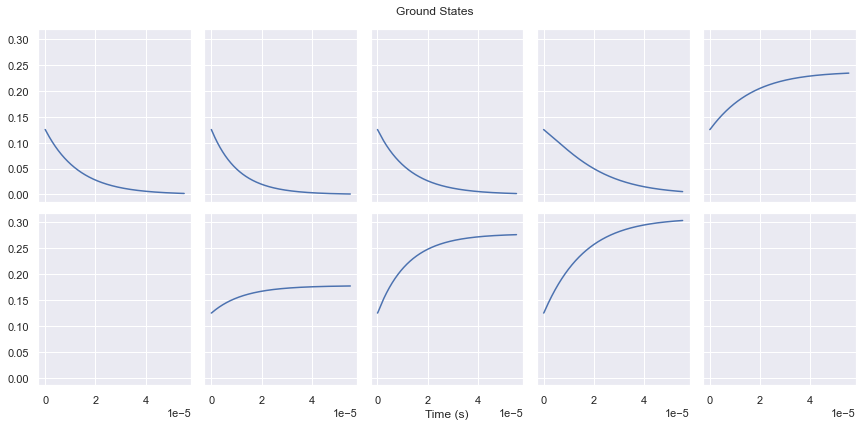

In [13]:
plot_excited_states_time(res)
plot_ground_states_time(res)

c:\Users\mv\anaconda3\envs\masterarbeitpy39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='time (s)', ylabel='Total Ground state population'>)

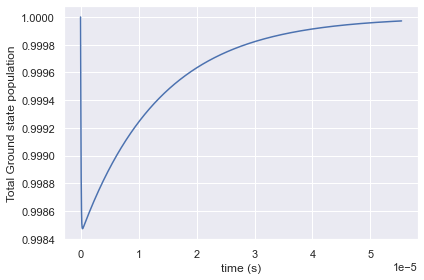

In [14]:
plot_total_ground_pop(res)

Text(0.5, 0.98, 'Steady State')

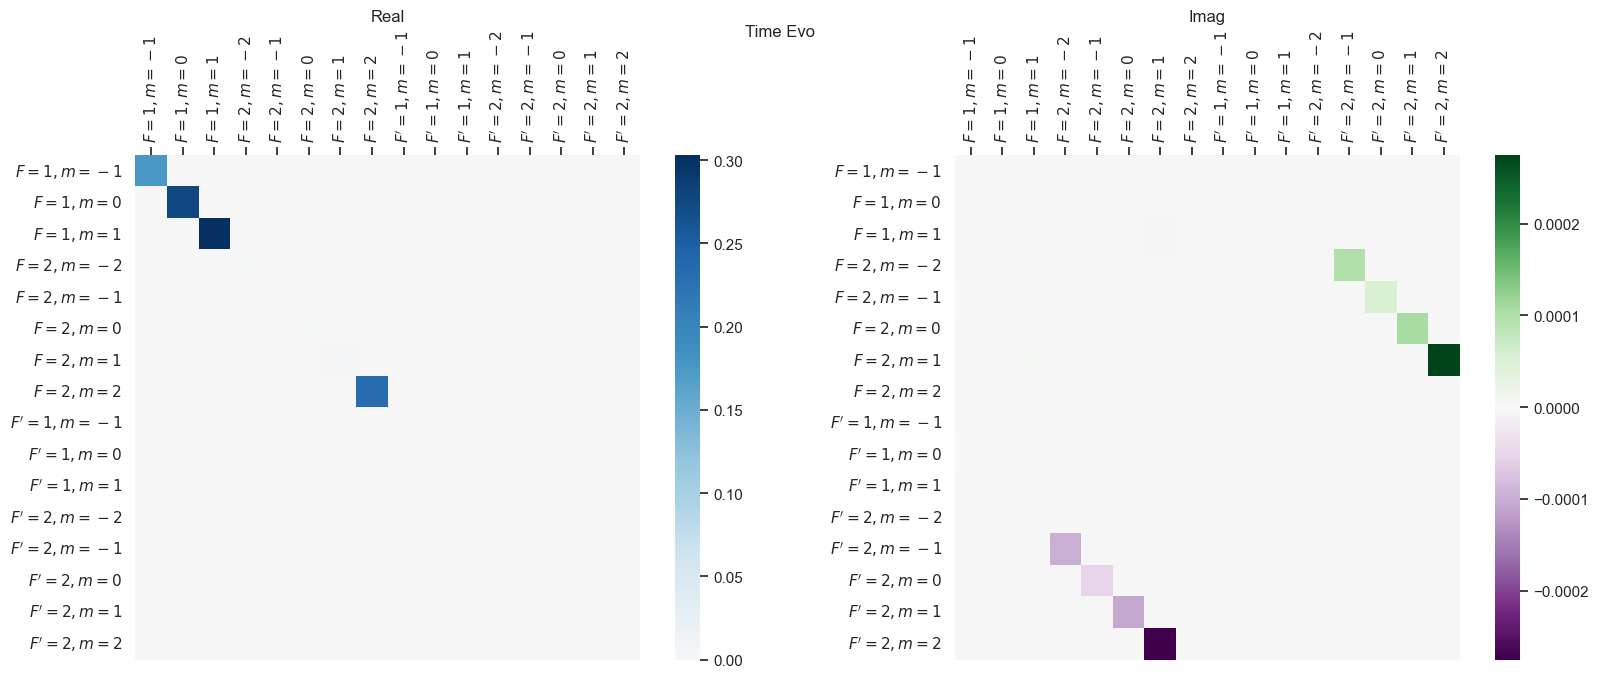

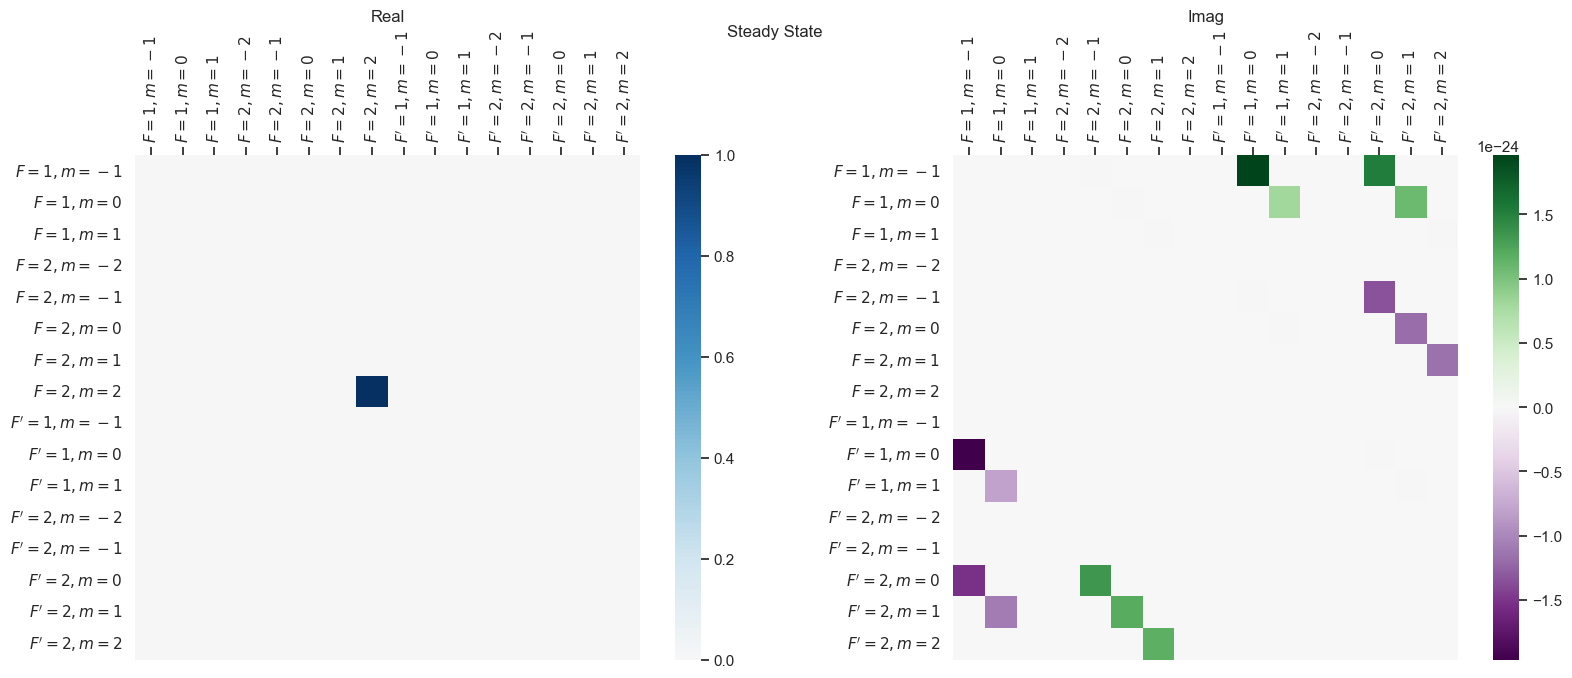

In [17]:
f, a = maplot(res.states[-1])
f.suptitle("Time Evo")
f1, a1 = maplot(rho_ss)
f1.suptitle("Steady State")

## Hamiltonian with Off-Resonant Terms removed

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

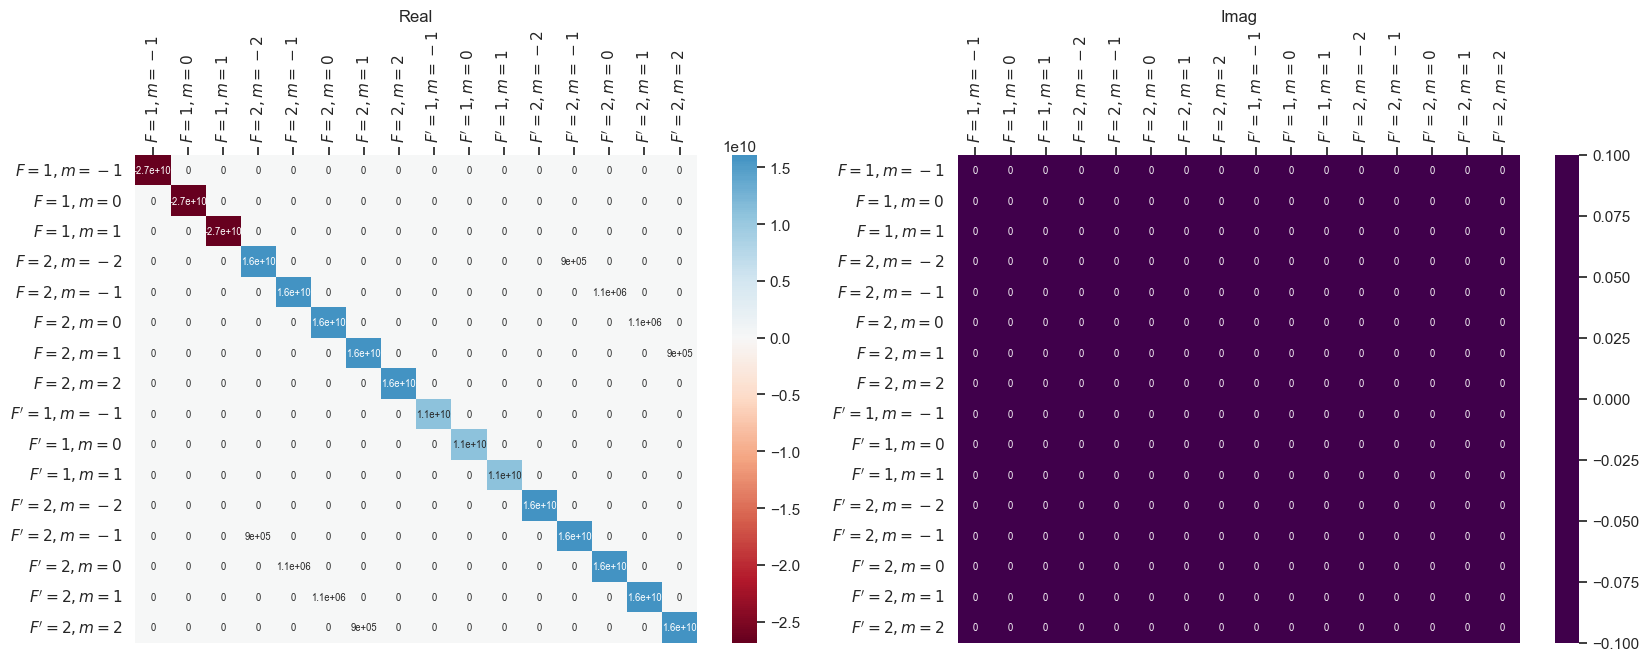

In [8]:
hamil_approx = hamil.copy()
tmp = hamil_approx.full()
tmp[:3, 3:] = 0
tmp[3:, :3] = 0
tmp[8:11, :8] = 0
tmp[:8, 8:11] = 0
hamil_approx = Qobj(tmp)
maplot(hamil_approx, annot=True)

In [19]:
Lap = liouvillian(
    hamil_approx,
    c_ops=(
        natural_decay_ops_D1() 
        # + F1_to_F2_ground_state_decay("D1") 
        # + F2_to_F1_ground_state_decay("D1")
        )
    )
rho_ss_approx = steadystate(Lap, method="eigen")

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

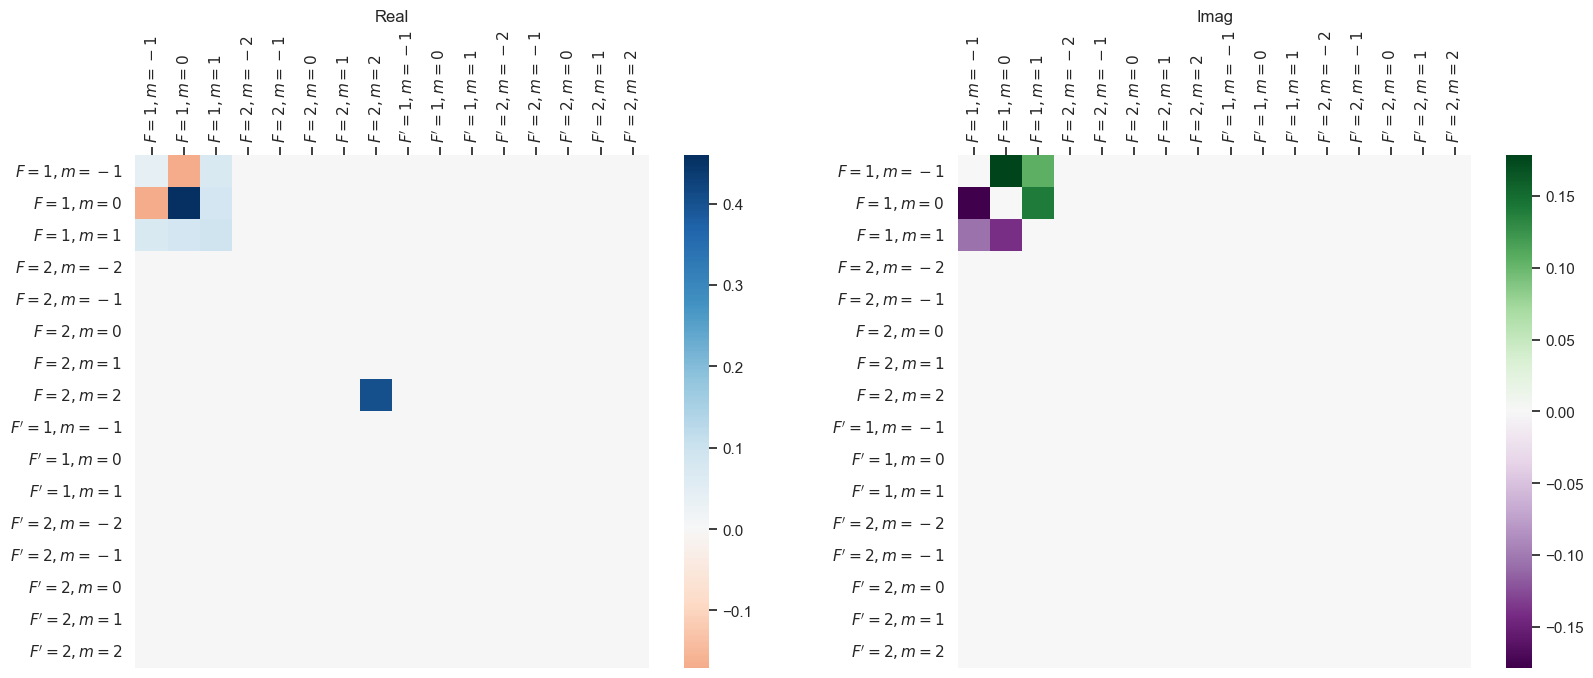

In [20]:
maplot(rho_ss_approx)

The approximate Hamiltonian leads to faster calculations:

In [21]:
start = time.perf_counter()
times = np.linspace(0, 50 / abs(hamil[-4,3]), 2000)
resa = mesolve(Lap,
              tlist=times,
              rho0=get_equally_ground_state_D1(),
              options=Options(nsteps=2**5 * 1000))
stop = time.perf_counter()
print(f"Time Evo Approx took {stop-start:.3f} seconds ------")
qsave(resa, "pumping_sigma_plus_f2_fp2_radecay_approx")

Time Evo Approx took 71.086 seconds ------


(<Figure size 864x432 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='Time (s)'>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

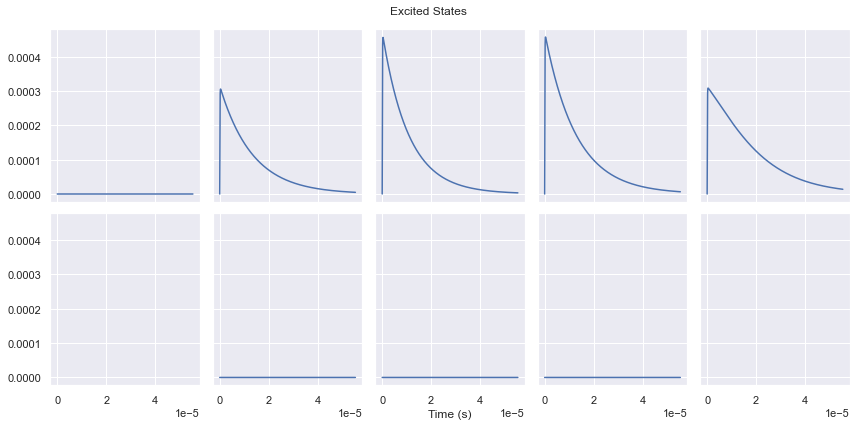

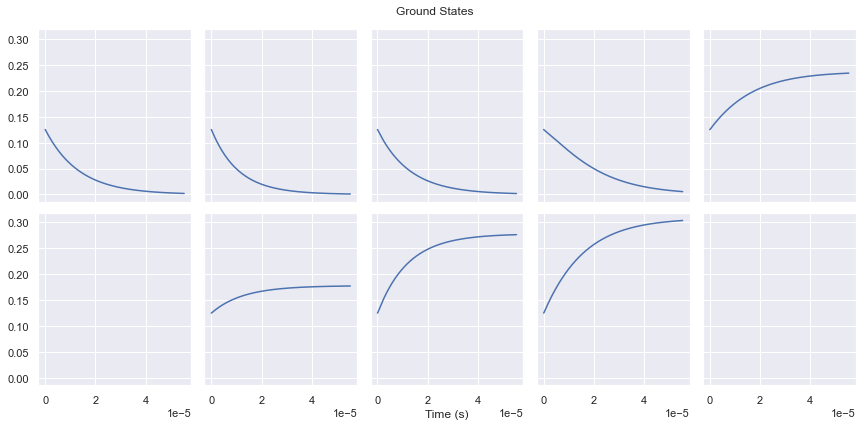

In [22]:
plot_excited_states_time(resa)
plot_ground_states_time(resa)

But we get different steady states

Text(0.5, 0.98, 'Steady State Approx')

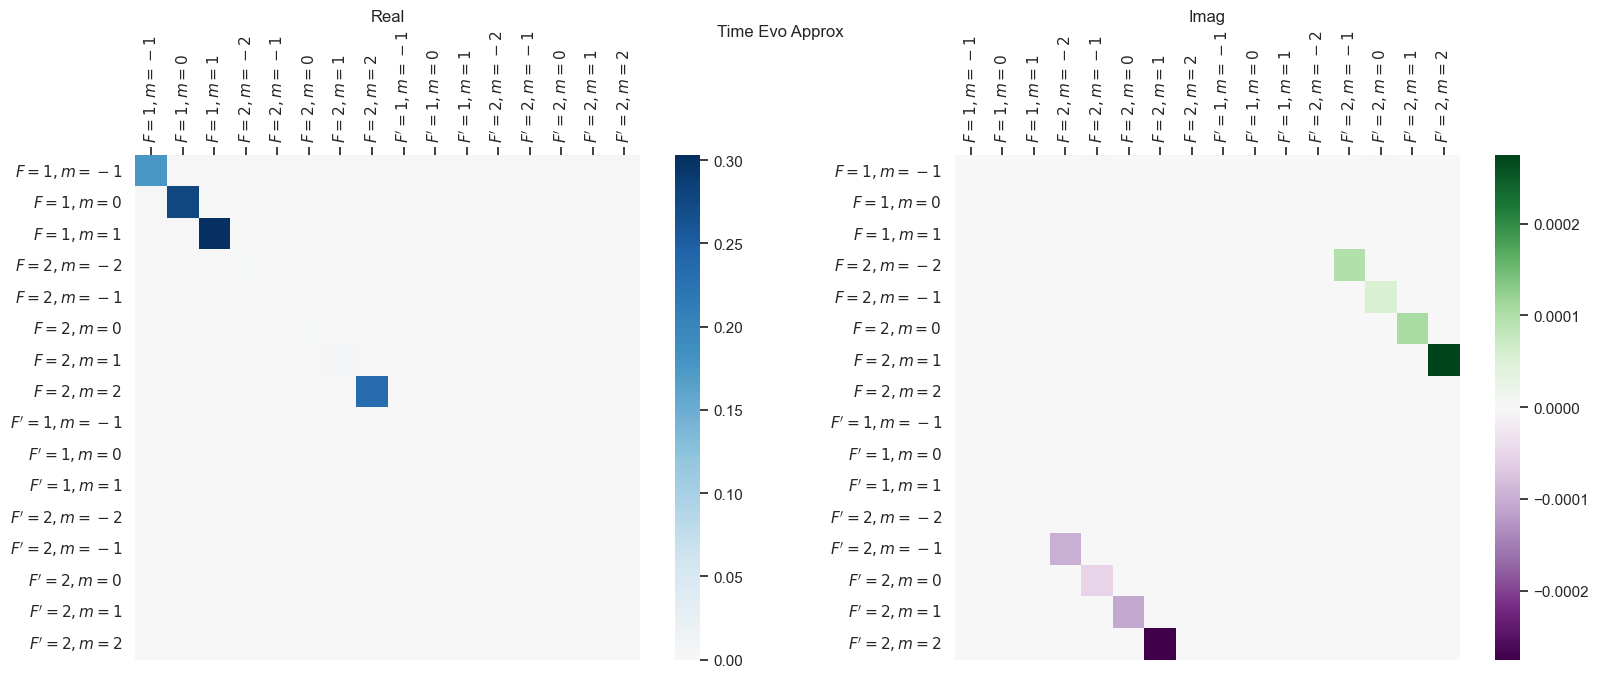

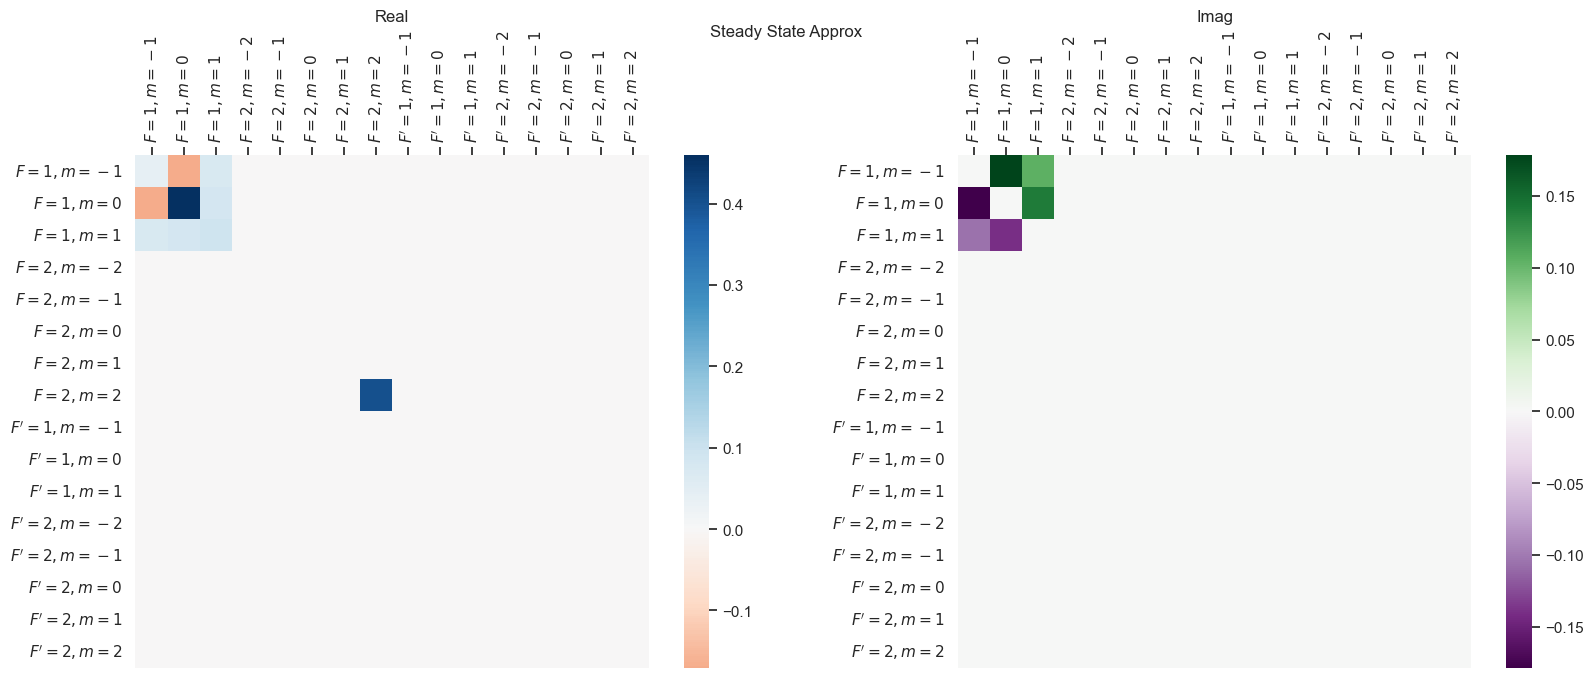

In [23]:
f, a = maplot(resa.states[-1])
f.suptitle("Time Evo Approx")
f1, a1 = maplot(rho_ss_approx)
f1.suptitle("Steady State Approx")

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='time (s)', ylabel='Total Ground state population'>)

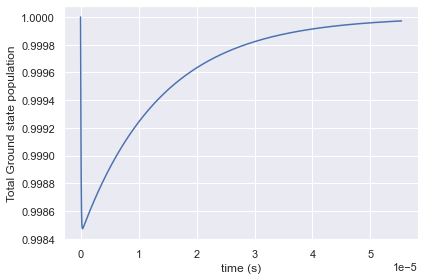

In [24]:
plot_total_ground_pop(resa)

(<Figure size 432x288 with 2 Axes>,
 [<AxesSubplot:title={'center':'F=2'}>, <AxesSubplot:title={'center':'F=1'}>])

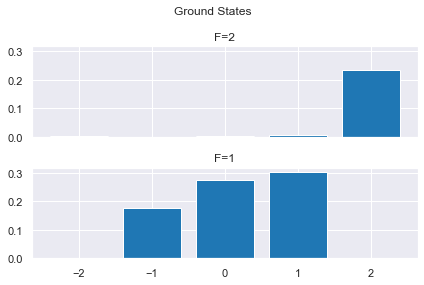

In [25]:
plot_bar_ground_pop(resa.states[-1])

### Difference of Steady-State density matrices

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

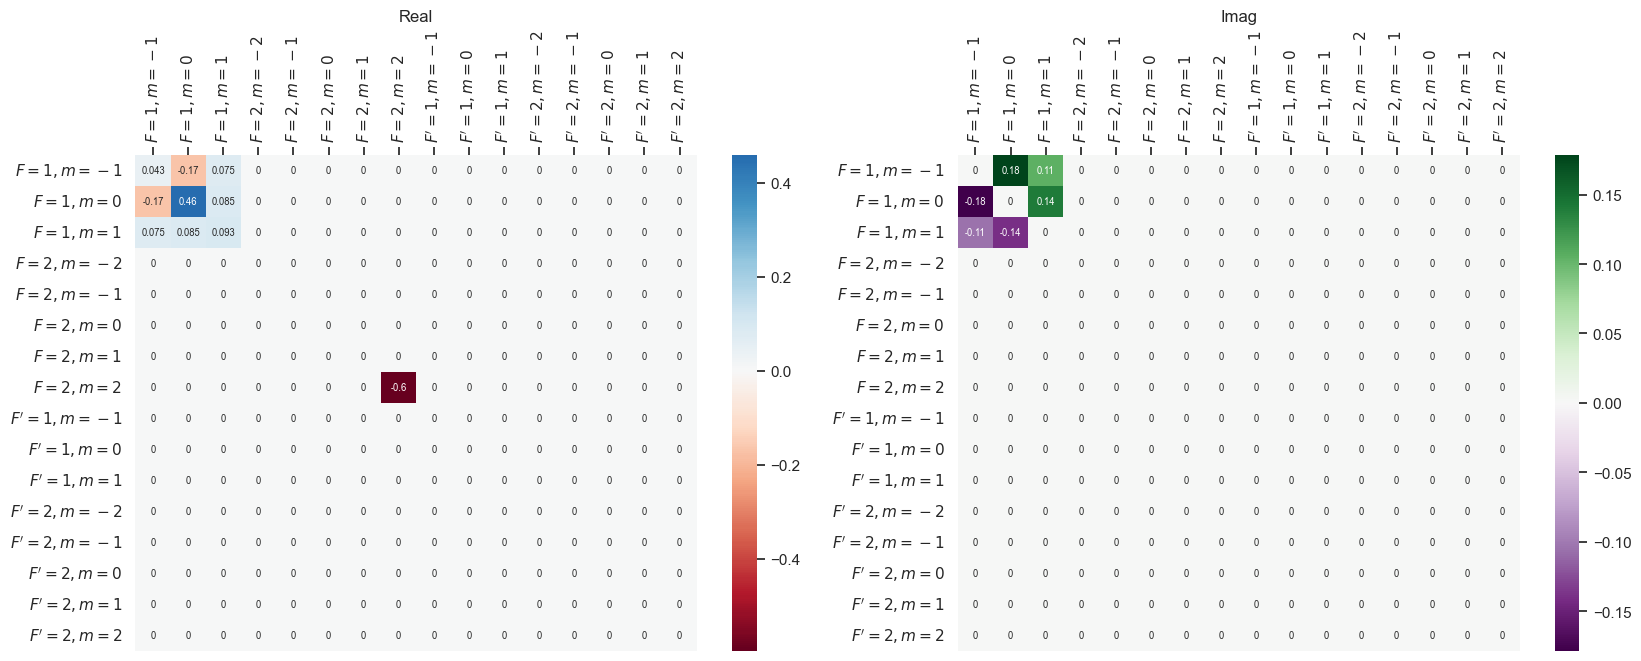

In [27]:
maplot(rho_ss_approx-rho_ss, annot=True)

# Now with Addtition of Ground-State-Decay
## Steady State Full Hamiltonian

In [6]:
L_gd = liouvillian(
    hamil,
    c_ops=(
        natural_decay_ops_D1() 
        + F1_to_F2_ground_state_decay("D1") 
        + F2_to_F1_ground_state_decay("D1")
        )
    )
rho_ss_gd = steadystate(L_gd)

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

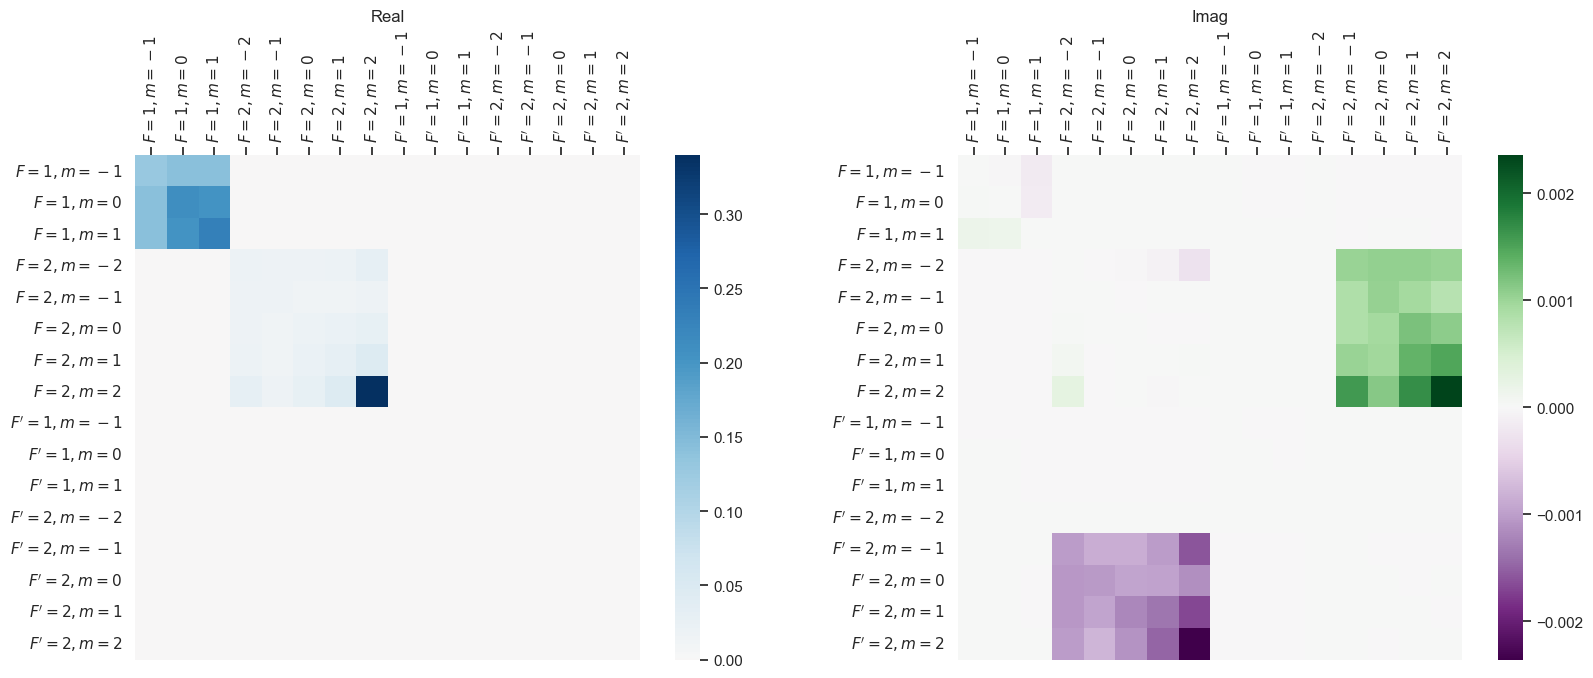

In [7]:
maplot(rho_ss_gd)

In [11]:
L_ap_gd = liouvillian(
    hamil_approx,
    c_ops=(
        natural_decay_ops_D1() 
        + F1_to_F2_ground_state_decay("D1") 
        + F2_to_F1_ground_state_decay("D1")
        )
    )
rho_ss_ap_gd = steadystate(L_ap_gd)

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

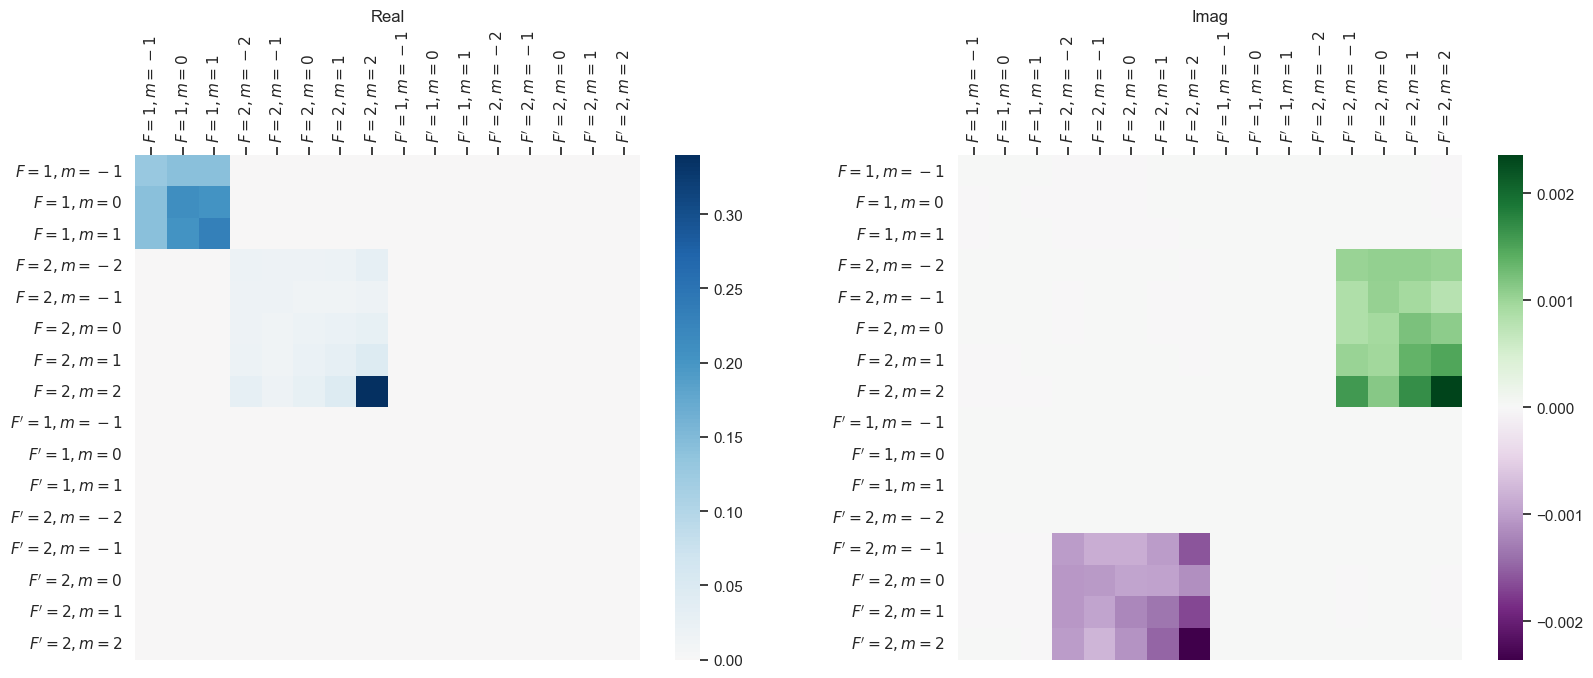

In [12]:
maplot(rho_ss_ap_gd)

(<Figure size 1680x672 with 4 Axes>,
 [<AxesSubplot:title={'center':'Real'}>,
  <AxesSubplot:title={'center':'Imag'}>])

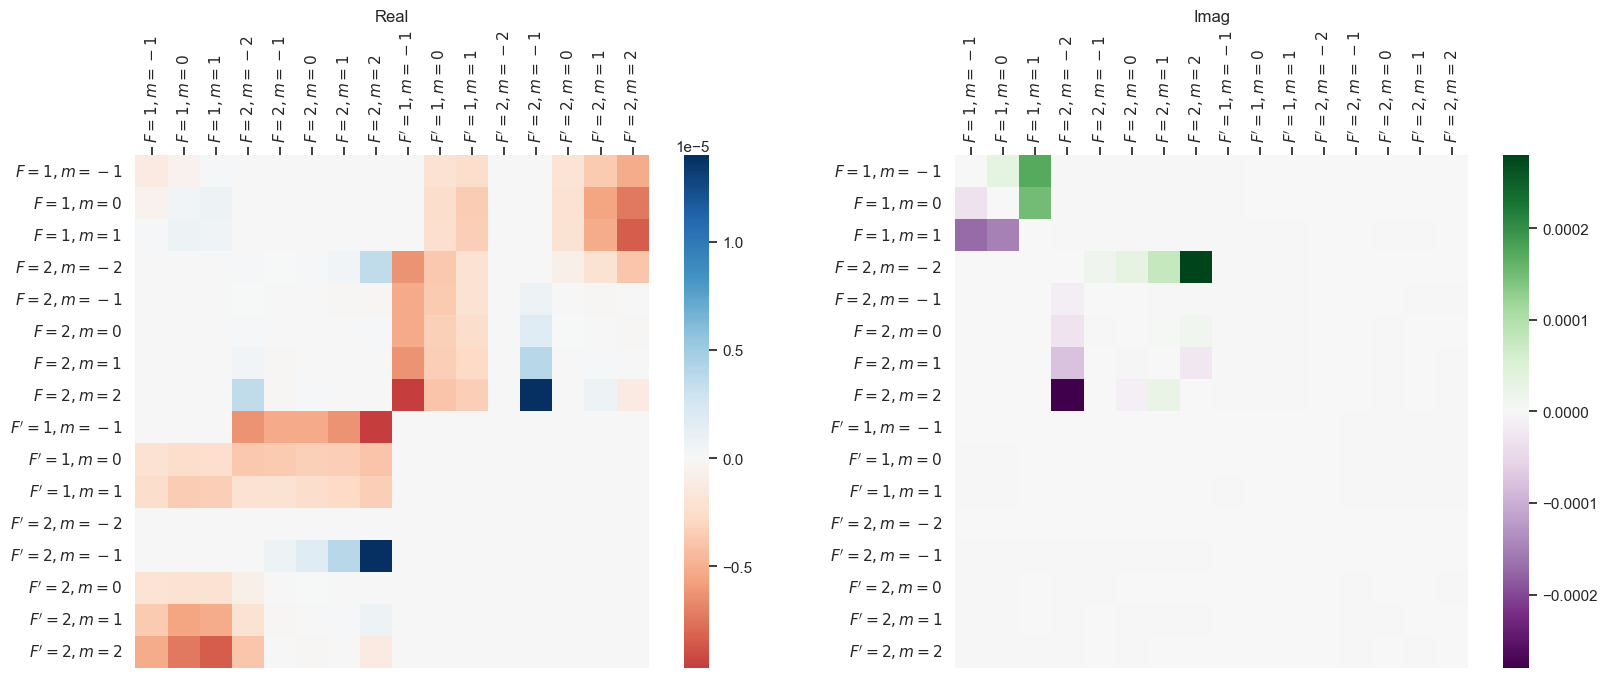

In [13]:
maplot(rho_ss_ap_gd - rho_ss_gd)